In [2]:
import os
import numpy as np
import bigfish
import bigfish.stack as stack
import bigfish.detection as detection
import bigfish.plot as plot
import matplotlib.pyplot as plt
print("Big-FISH version: {0}".format(bigfish.__version__))

Big-FISH version: 0.6.2


In [3]:
path_input = '/home/vvvanl/Documents/big-fish-examples/neuron_data/157_02_05-R1R2'
path_image = os.path.join(path_input, '157_02_05-R1R2_c2.tif')

image = stack.read_image(path_image)
print("\r shape: {0}".format(image.shape))
print("\r dtype: {0}".format(image.dtype))

 shape: (29, 512, 512)
 dtype: uint16


In [4]:
image_log = stack.log_filter(image, sigma=1.5)
log_out_path = os.path.join(path_input, '157_02_05-R1R2_c2_log.tif')
stack.save_image(image_log,log_out_path)

In [5]:
candidate_thresholds = detection.spot_detection._get_candidate_thresholds(image_log)
local_max = detection.spot_detection.local_maximum_detection(image_log,1)
spots,mask_spots = detection.spot_detection.spots_thresholding(image_log, local_max, float(candidate_thresholds[0]))
value_spots = image_log[mask_spots]
thresholds,count_spots = detection.spot_detection._get_spot_counts(candidate_thresholds, value_spots)
break_point, _, _ = detection.utils.get_breaking_point(thresholds, count_spots)
print(break_point)

76.0


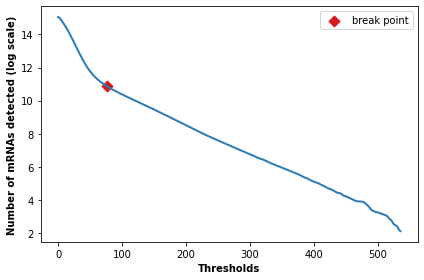

In [6]:
plt.plot(thresholds, count_spots, c="#2c7bb6", lw=2)
i_threshold = np.argmax(thresholds == break_point)
plt.scatter(break_point, count_spots[i_threshold],
        marker="D", c="#d7191c", s=60,
        label="break point")
plt.xlabel("Thresholds", fontweight="bold")
plt.ylabel("Number of mRNAs detected (log scale)",
        fontweight="bold")
plt.tight_layout()
plt.legend()